In [50]:
import xarray as xr
from matplotlib import pyplot as plt
import os
import netCDF4
import pandas as pd
import datetime
import numpy as np
import scipy
from scipy.signal import argrelextrema
import seaborn as sns
os. getcwd()

'C:\\Users\\1\\OneDrive\\Escritorio\\Education\\Master\\Tesis\\Algorithm'

In [51]:
from scipy.signal import argrelextrema
# for local maxima
def MAXMIN(BD,Var):
    """ 'Find local maxima and minima and calculates the difference between them  """
    BD['hour']=BD.index.hour
    vari=BD[Var].to_numpy()
    argrelextrema(vari, np.greater)
    # for local minima
    Variable='TA2_AUT_60@'
    if StationT[k]=='21235010':
         Variable='TSSM_CON@'
    if Variable=='TSSM_CON@':
        order1=1
        order2=1
    elif Variable=='w':
        order1=3
        order2=4
    elif Variable=='wr':
        order1=4
        order2=3 
    else:
        order2=6
        order1=4
    MINI=BD[Var].iloc[argrelextrema(vari, np.less_equal,order=order1)].to_numpy()
    MAXI=BD[Var].iloc[argrelextrema(vari, np.greater_equal,order=order2)].to_numpy()
    tMINI=BD[['hour',Var]].iloc[argrelextrema(vari, np.less_equal,order=order1)];tMINI['Ext']='Min'
    tMAXI=BD[['hour',Var]].iloc[argrelextrema(vari, np.greater_equal,order=order2)];tMAXI['Ext']='Max'
    tMINIidx=tMINI.index
    tMAXIidx=tMAXI.index
    H=pd.concat([tMINI,tMAXI]).sort_index()
    H.loc[tMAXIidx]
    H[r'$\Delta$']=H[Var].diff()
    H['time']=H.index.to_series().diff()
    H[r'$\Delta t$']=H['time'].apply(lambda x:x.seconds/3600)
    H['Station']=StationT[k]
    return H
def WindDir(x,y):
    """ Finding angle between Vy and Vx and converting it to wind direction  """
    A=np.rad2deg(np.arctan2(y, x))
    # result=np.zeros(len(x))
    for i in range(len(A)):
            a=A[i]
            if  a>90:
                A[i]=180+a
            else:
                A[i]=90-a
    return(A)
def QQ(BD,Var,f):
    if f==0:
        fun='max'
    elif f==1:
        fun='min'
    #Taking all the temperatures for the same month and day
    BD['year']=BD.index.year
    BD['month']=BD.index.month
    BD['day']=BD.index.day
    BD['hour']=BD.index.hour
    #1.  Calculating $\bar{t}(\tau_{i+1})
    BD[Var]=BD.groupby(['month','day','hour'])[Var].transform(fun)
    MC,Count,STD=[],[],[]
    BD['sum']=BD.groupby(['month','day'])[Var].transform('sum')
    BD['count']=BD.groupby(['month','day'])[Var].transform('count') 
    BD[r'$\bar{T}(\tau_{i+1})$']=BD.groupby(['month','day'])[Var].transform('mean')  
def Aver3(Ju):
    a=Ju.iloc[0:-2]
    b=Ju.iloc[1:-1]
    c=Ju.iloc[2::]
    n=a['count'].values+b['count'].values+c['count'].values
    mean=(a['sum'].values+b['sum'].values+c['sum'].values)
    mean=np.append(mean[0],mean);mean=np.append(mean, mean[-1])
    n=np.append(n[0],n);n=np.append(n, n[-1])
    Ju['sum2']=mean;Ju['count2']=n
    Ju[r'$\bar{T}(\tau_{i+1})$']=Ju.groupby(['month','day']).transform('sum')['sum2']/Ju.groupby(['month','day']).transform('sum')['count2']
    Ju['std']=np.power(Ju[r'$\Delta$'].values-Ju[r'$\bar{T}(\tau_{i+1})$'].values,2)
    a=Ju.iloc[0:-2]
    b=Ju.iloc[1:-1]
    c=Ju.iloc[2::]
    mean=(a['std'].values+b['std'].values+c['std'].values);mean=np.append(mean[0],mean);mean=np.append(mean, mean[-1])
    Ju['std']=mean
    Ju['S1']=(Ju.groupby(['month','day']).transform('sum')['std']/Ju.groupby(['month','day']).transform('sum')['count2'])
    Ju['std']=Ju['S1']**(1/2)
    return Ju
                                                                                                                       

In [68]:
# Path='/media/usuario/7fad240a-7ab6-43a9-a6ff-db074983559c/home/smeagle/Escritorio/All/DATA/DATAfromIdeam/RADICADO_20229050002332/'
Path=b'C:\Users\1\OneDrive\Escritorio\Education\Master\Tesis\Algorithm\RADICADO_20229050002332/'
Path='C:\\Users\\1\\OneDrive\\Escritorio\\Education\\Master\\Tesis\\Algorithm\\RADICADO_20229050002332\\'
# StationT=['21235030','21255160','21185090','21115180','21235010']
StationT=['21235030','21255160','21185090','21235010']
def Temperature(k):
    Variable='TA2_AUT_60@'
    if StationT[k]=='21235010':
         Variable='TSSM_CON@'
    T=pd.read_csv(Path+Variable+StationT[k]+'.data',delimiter='|',parse_dates=True,header=0,names=['time','Temperature'],index_col='time')
    T['Temperature'].replace(0,np.nan,inplace=True)
    #Taking all the temperatures for the same month and day
    T[T['Temperature']==0]
    T.index.to_series().diff()
    F=MAXMIN(T,'Temperature')
    F=F[(F[r'$\Delta t$']>4)&(F[r'$\Delta t$']<21)] #
    F=F[F['Ext']=='Max']
    variable=r'$\dot{T}$'
    variable=r'$\Delta$'
    QQ(F,r'$\Delta$',0)
    F['std']=F.groupby(['month','day'])[variable].transform('std')
    # F['count']=F.groupby(['month','day'])[variable].transform('count').transform(np.sqrt)
    F[(F['month']==1)&(F['day']==1)]###Quitar para GIThub
    F[r'$\dot{T}$']=F[r'$\Delta$']/F[r'$\Delta t$']
    Aver3(F)  
    F.count()
    F[r'$q-\bar{q}$']=F[r'$\Delta$']-F[r'$\bar{T}(\tau_{i+1})$']
    #Calculating sigma
    g=1
    #Applying hypothesis
    FF=F[F[r'$q-\bar{q}$']>=F['std']*g*1]
    FF.sort_values(by=r'$\Delta$')
    H1T=FF
    return H1T
def RH(k):
    Variable='HRA2_AUT_60@'
    StationRH=['21235030','21255160','21185090','21115180','21235010']
    if StationRH[k]=='21235010':
         Variable='HR_CAL@'
    HR=pd.read_csv(Path+Variable+StationRH[k]+'.data',delimiter='|',parse_dates=True,header=0,names=['time','Relative Humidity (%)'],index_col='time')
    HR['Relative Humidity (%)'].replace(0,np.nan,inplace=True)
    HR['Relative Humidity (%)'].replace(1.0,np.nan,inplace=True)
    G=MAXMIN(HR,'Relative Humidity (%)')
    G=G[G[r'$\Delta t$']>4]
    G=G[G['Ext']=='Min']
    QQ(G,r'$\Delta$',1)
    variable=r'$\Delta$'
    G.rename(columns={r'$\dot{T}$':r'$\dot{RH}$'},inplace=True)
    G['std']=G.groupby(['month','day'])[variable].transform('std')
    G[r'$\dot{RH}$']=G[r'$\Delta$']/G[r'$\Delta t$']
    Aver3(G)  
    G.rename(columns={r'$\bar{T}(\tau_{i+1})$':r'$\bar{RH}(\tau_{i+1})$'},inplace=True)
    G[r'$q-\bar{q}$']=G[r'$\Delta$']-G[r'$\bar{RH}(\tau_{i+1})$']
    #Calculating sigma
    g=1
    #Applying hypothesis
    GG=G[-1*G[r'$q-\bar{q}$']>=G['std']*g*1]
    G.sort_values(by=r'$\Delta$')
    JJ=GG.rename(columns={r'$\Delta$':r'$\Delta RH$'})
    return JJ
def MERGE(H1RH,H1T):
    H124=np.intersect1d(H1RH.index.date,H1T.index.date)#With amplitudes
    return H124

In [69]:
def Velocity(H12,H1RH,H1T):
    #If the variable is Wind direction of maximum speed (DVMX_MX_D)
    Variable='DVMX_MX_D@'
    StationDV='21206920'
    theta=32
    global DV
    DV=pd.read_csv(Path+Variable+StationDV+'.data',delimiter='|',parse_dates=True,header=0,names=['time','Direction'],index_col='time')
    H1DV=DV[(DV['Direction']<135+theta)&(DV['Direction']>theta+45)&(DV.index.hour<14)].index.date
    B=H1RH.copy();B.index=B.index.date
    A=H1T.copy();A.index=A.index.date
    data11=A.loc[np.intersect1d(H12,H1DV)].drop_duplicates()
    data12=B.loc[np.intersect1d(H12,H1DV)].drop_duplicates()
    data11[[r'$\dot{RH}$',r'$\Delta RH$']]=data12[[r'$\dot{RH}$',r'$\Delta RH$']]
    data11[r'$\dot{RH}$']=data12[r'$\dot{RH}$']
    data11.to_csv(StationT[k]+'DV'+StationDV+'.csv')
    #If the variable is Wind direction of maximum speed (DVMX_MX_D)
    Variable='DVMX_AUT_60@'
    StationDV='21195170'
    theta=32
    DV2=pd.read_csv(Path+Variable+StationDV+'.data',delimiter='|',parse_dates=True,header=0,names=['time','Direction'],index_col='time')
    H1DV=DV2[(DV2['Direction']<135+theta)&(DV2['Direction']>theta+45)&(DV2.index.hour<14)].index.date
    BB=H1RH.copy();BB.index=BB.index.date
    AA=H1T.copy();AA.index=AA.index.date
    data21=AA.loc[np.intersect1d(H12,H1DV)].drop_duplicates()
    data22=BB.loc[np.intersect1d(H12,H1DV)].drop_duplicates()
    data21[[r'$\dot{RH}$',r'$\Delta RH$']]=data22[[r'$\dot{RH}$',r'$\Delta RH$']]
    data21[r'$\dot{RH}$']=data22[r'$\dot{RH}$']
    data21.to_csv(StationT[k]+'DV'+StationDV+'.csv')

In [70]:
for k in range(4):
    H11T=Temperature(k)
    H11RH=RH(k)
    H124=MERGE(H11T,H11RH)
    Velocity(H124,H11RH,H11T)

In [71]:
import glob
from functools import reduce
Casos= [f for f in glob.glob("*DV*")]
Cases=[]
for i in Casos:
    j = pd.read_csv(i,index_col=0,parse_dates=True)
    Cases.append(j)

<AxesSubplot:>

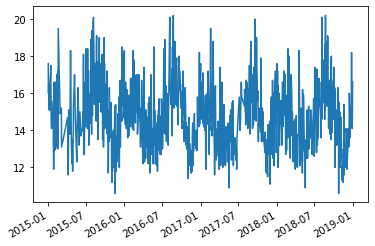

In [41]:
Foehn=pd.concat(Cases)
Foehn=Foehn.drop_duplicates()
Foehn = Foehn.sort_values(by=r'$\Delta$', ascending=False)
Foehn['N cases']=Foehn.groupby(['month','day','year']).transform('count')['hour']
Foehn = Foehn[~Foehn.index.duplicated(keep='first')]#Dropping duplicates, keeping highest value of delta T
Foehn['2016':'2019']
Foehn=Foehn[Foehn[r'$\Delta$']<21]
Foehn[r'$\Delta$']['2015':'2018'].plot()
# Foehn['2019-08-27']
# Foehn=H124

<AxesSubplot:>

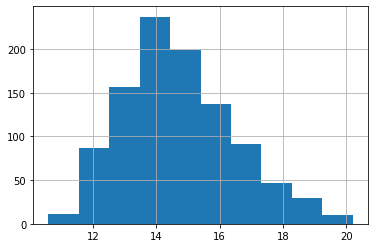

In [15]:
Foehn[r'$\Delta$']['2015':'2018'].hist()
# Foehn

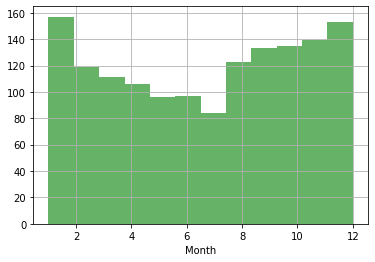

In [76]:
Foehn.rename(columns={'month':'Month'},inplace=True)
Foehn.rename(columns={'$\Delta$':'$\Delta T$'},inplace=True)
Foehn.sort_index().loc['2014-01-01':'2021-03-03'].hist('Month',bins=12,color="green",alpha=0.6)
plt.xlabel('Month')
plt.title('')
plt.savefig('CasesByMonth.png',bbox_inches='tight')

In [17]:
Foehn.sort_index().loc['2014-08-23':'2019-08-27']

,hour,Temperature,Ext,$\Delta T$,time,$\Delta t$,Station,year,Month,day,...,$\bar{T}(\tau_{i+1})$,std,$\dot{T}$,sum2,count2,S1,$q-\bar{q}$,$\dot{RH}$,$\Delta RH$,N cases
2014-08-24,16,38.5,Max,15.4,0 days 10:00:00,10.0,21255160,2014,8,24,...,14.578223,0.475181,1.540000,590.0,41,0.225797,0.821777,-5.500000,-55.0,1
2014-08-25,15,34.0,Max,13.0,0 days 08:00:00,8.0,21235030,2014,8,25,...,11.927778,0.515575,1.625000,429.4,36,0.265818,1.072222,-8.666667,-52.0,1
2014-08-26,14,34.0,Max,14.1,0 days 08:00:00,8.0,21255160,2014,8,26,...,12.675048,0.385307,1.762500,540.1,41,0.148462,1.424952,-7.000000,-56.0,1
2014-08-27,16,34.0,Max,15.1,0 days 10:00:00,10.0,21235030,2014,8,27,...,12.311111,0.500624,1.510000,443.2,36,0.250624,2.788889,-6.857143,-48.0,1
2014-08-30,15,38.1,Max,16.8,0 days 09:00:00,9.0,21255160,2014,8,30,...,14.555052,0.514340,1.866667,597.0,41,0.264546,2.244948,-5.818182,-64.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-08-22,14,39.0,Max,18.7,0 days 08:00:00,8.0,21185090,2019,8,22,...,16.028803,0.874064,2.337500,614.3,38,0.763988,2.671197,-7.000000,-56.0,5
2019-08-23,14,37.3,Max,20.2,0 days 08:00:00,8.0,21185090,2019,8,23,...,15.282772,0.817116,2.525000,596.7,39,0.667678,4.917228,-7.250000,-58.0,1
2019-08-25,13,39.3,Max,17.6,0 days 08:00:00,8.0,21185090,2019,8,25,...,13.141564,1.575336,2.200000,486.4,37,2.481684,4.458436,-7.833333,-47.0,1
2019-08-26,14,36.8,Max,15.7,0 days 08:00:00,8.0,21185090,2019,8,26,...,13.305405,0.917876,1.962500,492.3,37,0.842496,2.394595,-6.500000,-52.0,2


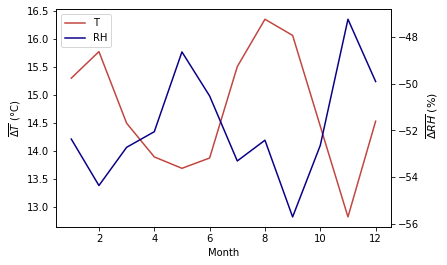

In [83]:
fig, ax = plt.subplots()

ax.yaxis.tick_right()
####################################################################################
axis_1=Foehn.sort_index().loc['2014':'2021'].groupby(by='Month').mean()[['$\Delta T$']].plot(ax=ax,xlabel='Month',ylabel=r'$\overline{\Delta T}$ (°C)',color='#c14540')   
axis_2=Foehn.sort_index().loc['2014':'2021'].groupby(by='Month').mean()[['$\Delta RH$']].plot(ax=ax,xlabel='Month',secondary_y = True,color='#0a0087')
ax.text(1.1, 0.51,r'$\overline{\Delta RH}$ (%)',
           rotation=90, size=11, 
           ha='left', va='center', transform=ax.transAxes)
lines_1, labels_1 = axis_1.get_legend_handles_labels()
lines_2, labels_2 = axis_2.get_legend_handles_labels()
lines = lines_1 + lines_2
labels = ['T']+ ['RH']
axis_1.legend(lines, labels, loc=2)
# plt.savefig(patht+'TRHH'+StationT[i]+Date+'.png',bbox_inches='tight')

# Foehn.loc['2014':'2021'].groupby(by='month').mean()[['$\Delta$']].plot()
# Foehn.loc['2014':'2021'].groupby(by='month').mean()[['$\Delta RH$']].plot()


Text(0.5, 1.0, '$\\overline{\\Delta RH}$ (%)')

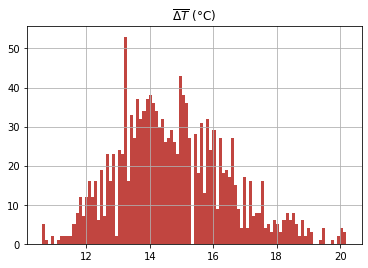

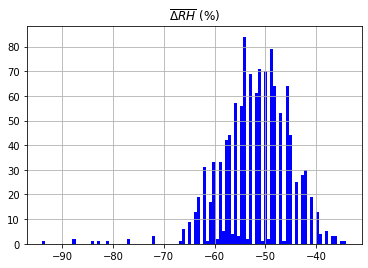

In [84]:
# Foehn.loc['2014'::].hist('month',bins=12)
Foehn.sort_index().loc['2014':'2020'].groupby(by='Month').mean()[['$\Delta T$','$\Delta RH$']]
Foehn.sort_index().loc['2014':'2020'].hist('$\Delta T$',bins=100,color='#c14540')
plt. title(r'$\overline{\Delta T}$ (°C)')
Foehn.sort_index().loc['2014':'2020'].hist('$\Delta RH$',bins=100,color='blue')
plt. title(r'$\overline{\Delta RH}$ (%)')

In [85]:
Foehn.sort_index().loc['2014':'2021'].describe()

,hour,Temperature,$\Delta T$,$\Delta t$,Station,year,Month,day,sum,count,$\bar{T}(\tau_{i+1})$,std,$\dot{T}$,sum2,count2,S1,$q-\bar{q}$,$\dot{RH}$,$\Delta RH$,N cases
count,1572.000000,1572.000000,1572.000000,1572.000000,1.572000e+03,1572.000000,1572.000000,1572.000000,1572.000000,1572.000000,1572.000000,1572.000000,1572.000000,1572.000000,1572.000000,1572.000000,1572.000000,1273.000000,1273.000000,1572.000000
mean,14.678117,35.263422,14.736641,8.980280,2.120044e+07,2016.957379,6.879135,15.587150,188.929198,14.055344,12.856552,0.612324,1.724276,552.982634,42.192112,0.433019,1.880089,-6.128761,-51.845562,1.802799
std,1.118426,2.538248,1.755680,1.893469,5.197347e+04,2.038169,3.660395,8.770831,100.126223,5.908284,1.388705,0.241070,0.466777,282.913332,17.680127,0.382811,1.069541,1.513242,6.867864,0.974163
min,10.000000,25.800000,10.600000,5.000000,2.111518e+07,2014.000000,1.000000,1.000000,51.100000,5.000000,9.434500,0.026638,0.727778,184.900000,17.000000,0.000710,0.114938,-16.800000,-100.100000,1.000000
25%,14.000000,33.600000,13.500000,8.000000,2.118509e+07,2015.000000,4.000000,8.000000,137.200000,11.000000,11.809302,0.441645,1.390000,403.200000,33.000000,0.195050,1.080000,-6.875000,-56.000000,1.000000
50%,15.000000,35.300000,14.600000,9.000000,2.118509e+07,2017.000000,7.000000,15.000000,163.900000,13.000000,12.755516,0.578529,1.612500,486.700000,38.000000,0.334696,1.650852,-6.000000,-51.000000,2.000000
75%,16.000000,37.000000,15.800000,10.000000,2.125516e+07,2018.000000,10.000000,23.000000,188.950000,14.000000,13.699437,0.724849,1.944444,552.500000,43.000000,0.525407,2.491472,-5.200000,-47.000000,2.000000
max,17.000000,42.000000,20.200000,18.000000,2.125516e+07,2021.000000,12.000000,31.000000,582.800000,32.000000,17.265625,1.851357,3.300000,1613.800000,96.000000,3.427523,6.281081,-2.000000,-34.000000,6.000000


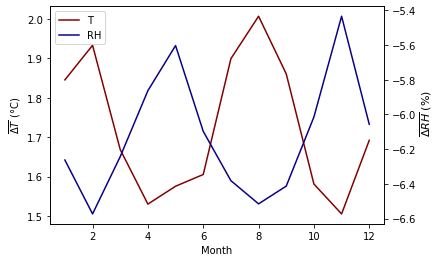

In [86]:
fig, ax = plt.subplots()

ax.yaxis.tick_right()
####################################################################################
axis_1=Foehn.sort_index().loc['2014':'2021'].groupby(by='Month').mean()[['$\dot{T}$']].plot(ax=ax,xlabel='Month',ylabel=r'$\overline{\Delta T}$ (°C)',color='#830000')   
axis_2=Foehn.sort_index().loc['2014':'2021'].groupby(by='Month').mean()[['$\dot{RH}$']].plot(ax=ax,xlabel='Month',secondary_y = True,color='#0a0087')
ax.text(1.1, 0.51,r'$\overline{\Delta RH}$ (%)',
           rotation=90, size=11, 
           ha='left', va='center', transform=ax.transAxes)
lines_1, labels_1 = axis_1.get_legend_handles_labels()
lines_2, labels_2 = axis_2.get_legend_handles_labels()
lines = lines_1 + lines_2
labels = ['T']+ ['RH']
axis_1.legend(lines, labels, loc=2)

# Obtaining the cases in which $\Delta T$ and $\Delta RH$ were much larger than the average value.

array([[<AxesSubplot:title={'center':'Month'}>]], dtype=object)

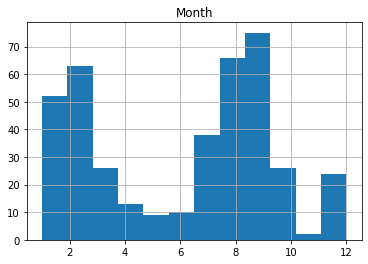

In [87]:
F5=Foehn[(Foehn[r'$\Delta T$']>14.45)&(Foehn[r'$\Delta RH$']<-51)]
F5.sort_index().loc['2014':'2020'].hist('Month',bins=12)